**Dicoding Final Submission: Belajar Pengembangan Machine Learning**  

> **Nama**     : Muhammad Hafizh Yanuardi

> **Domisili** : Kota Banjarmasin











Mengimport berbagai library untuk digunakan pada project

In [1]:
from google.colab import drive
import pathlib
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

Memount Google Drive untuk dapat digunakan pada proyek


In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


*   Mengimport dataset






In [3]:
# memasukkan direktori awal

base_dir = './drive/MyDrive/Colab_Notebooks/diamond_images/'

In [4]:
# Melihat nama-nama folder di directory

os.listdir(base_dir)

['emerald', 'heart', 'pear']

In [5]:
train_dir = base_dir

*   Melakukan Generate Image



In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.3,
    fill_mode='nearest',
    validation_split=0.2

)


In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=16,
    classes=['emerald','heart','pear'],
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=16,
    classes=['emerald','heart','pear'],
    class_mode='categorical',
    subset='validation'

)

Found 9190 images belonging to 3 classes.
Found 2296 images belonging to 3 classes.


*   Membuat model Convolutional Neural Network menggunakan Tensorflow



In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

*   Menggunakan Callback untuk mengontrol proses training



In [11]:
from tensorflow.keras.callbacks import Callback
from timeit import default_timer as timer

# Callback untuk menghentikan training ketika akurasi validasi diatas 92%.
# Dalam kode ditambahkan 0.01% untuk memastikan bahwa akurasi lebih dari 92.00%
class ValAccCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.9201 and logs.get('accuracy') >= 0.9201):
          self.model.stop_training = True
          print("\n[accuracy | val_accuracy yang didapatkan senilai %2.2f%% | %2.2f%%, training dihentikan.]\n"
                % ((logs.get('accuracy')*100), (logs.get('val_accuracy')*100)))

        else:
          print("\n[accuracy | val_accuracy yang didapatkan senilai %2.2f%% | %2.2f%%, lanjut ke epoch berikutnya]\n"
                % ((logs.get('accuracy')*100), (logs.get('val_accuracy')*100)))

In [12]:
val_acc_callback = ValAccCallback()

*   Melakukan Training



In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=1,
    callbacks=[val_acc_callback],
)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.6015 - accuracy: 0.7419
[accuracy | val_accuracy yang didapatkan senilai 74.19% | 61.62%, lanjut ke epoch berikutnya]

100/100 [==============================] - 434s 4s/step - loss: 0.6015 - accuracy: 0.7419 - val_loss: 0.7051 - val_accuracy: 0.6162
Epoch 2/15
100/100 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9650
[accuracy | val_accuracy yang didapatkan senilai 96.50% | 99.12%, training dihentikan.]

100/100 [==============================] - 276s 3s/step - loss: 0.1178 - accuracy: 0.9650 - val_loss: 0.0581 - val_accuracy: 0.9912


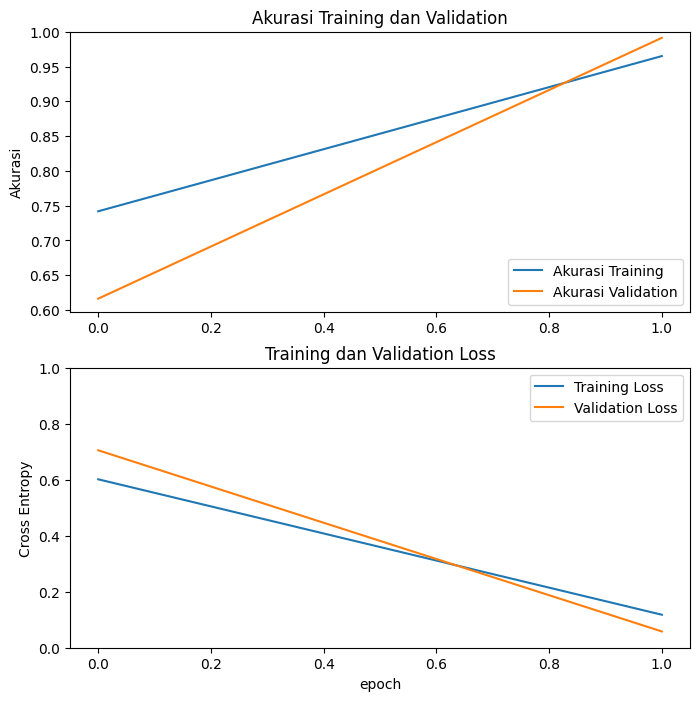

In [14]:
import matplotlib.pyplot as plt

# Menampilkan output dari training

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Akurasi Training')
plt.plot(val_acc, label='Akurasi Validation')
plt.legend(loc='lower right')
plt.ylabel('Akurasi')
plt.ylim([min(plt.ylim()),1])
plt.title('Akurasi Training dan Validation')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training dan Validation Loss')
plt.xlabel('epoch')
plt.show()

*   Prediksi isyarat tangan menggunakan model



Saving 211442-34.jpg to 211442-34.jpg
1/1 [==============================] - 0s 186ms/step
heart


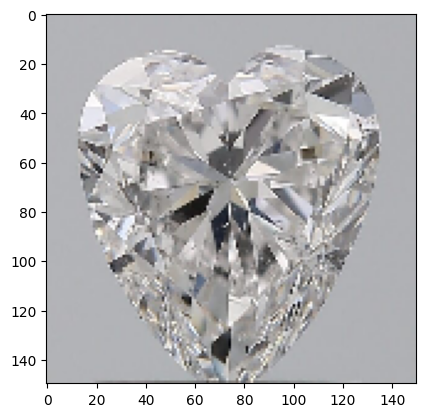

In [15]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  #Melakukan prediksi
  prediction = model.predict(images, batch_size=10)

  #Mengolah output agar dapat diprint
  classes = ['emerald','heart','pear']
  results = str(prediction[0]).strip("[].").replace(" ","").split('.')
  results = [int(results[i]) for i in range(len(results))]

  #Melakukan print hasil prediksi
  for i in range(len(results)):
    if results[i] == 1:
      print(classes[i])
      break

Menyimpan Model dengan format **.tflite**

In [16]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi diamonds.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('diamonds.tflite')
tflite_model_file.write_bytes(tflite_model)

14407580